# Session 3 Tasks

In [2]:
# Prequisites
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Task 1

Testing line detection (No need to run)

In [49]:
# Show result of hough transforms on images
# apply hough transform to image shapes.jpg
img = cv2.imread('./assets/Task1/Red (4).png')
img=cv2.GaussianBlur(img,(3,3),100)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
# plt.show()

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Apply one shot filter
canny = cv2.Canny(gray, 2, 70)
# Show image
# plt.imshow(canny, cmap='gray')
# plt.show()
# Apply hough transform
lines = cv2.HoughLinesP(canny, 1, np.pi/180,7,minLineLength=5,maxLineGap=10)
# lines = cv2.HoughLines(canny, 1, np.pi/180, 100)
# print(lines.shape)
# Draw lines on blank image
blank = np.zeros((323,470, 3), int)
for line in lines:
    # print(line)
    # rho, theta = line[0]
    # a = np.cos(theta)
    # b = np.sin(theta)
    # x0 = a*rho
    # y0 = b*rho
    # #draw line
    # x1 = int(x0 + 1000*(-b))
    # y1 = int(y0 + 1000*(a))
    # #draw line
    # x2 = int(x0 - 1000*(-b))
    # y2 = int(y0 - 1000*(a))
    # #draw line
    # cv2.line(blank, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Probalistic 
    x0, y0, x1, y1 = line[0]
    cv2.line(blank, (x0, y0), (x1, y1), (0, 250, 250), 2)

# Show image
# plt.imshow(blank)
# plt.show()

Task


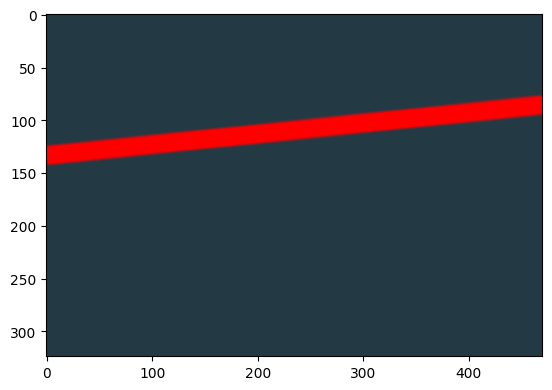

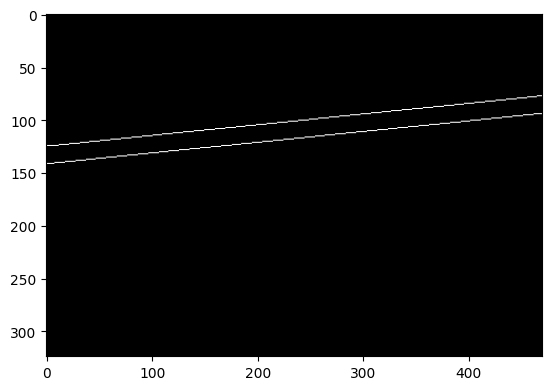

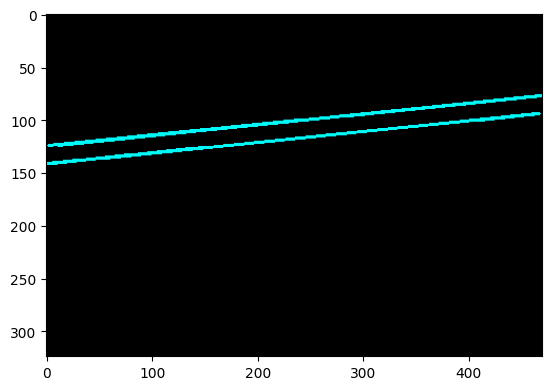

In [52]:
# Read Image
img = cv2.imread('./assets/Task1/Red (6).png')
img=cv2.GaussianBlur(img,(3,3),100)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.show()

# Threshold the Red color in image
lowcolor = (0,0,200)
highcolor = (50,50,255)
thresh = cv2.inRange(img, lowcolor, highcolor)

# Apply one shot filter
canny = cv2.Canny(thresh, 2, 70)
# Show image
plt.imshow(canny, cmap='gray')
plt.show()

 # Draw lines on blank image
blank = np.zeros(img.shape, int)

# Apply hough transform
lines = cv2.HoughLinesP(canny, 1, np.pi/180,7,minLineLength=20,maxLineGap=10)       # Min length 20 so Circles
if lines is not None:
    # print(lines)
    
    # get min point
    min = np.array([img.shape[1], img.shape[0]])
    for line in lines:
        # Probalistic
        x0, y0, x1, y1 = line[0]

        
        cv2.line(blank, (x0, y0), (x1, y1), (0, 250, 250), 2)

# Show image
plt.imshow(blank)
plt.show()

In [53]:
# Check if line needed if big circles but for now setting min length to 20 solves it

# Get minimum point
if lines is not None:
    reshaped = lines.reshape((-1, 2))
    # Use the sorted indices to sort the original array
    sorted_lines = reshaped[reshaped[:, 1].argsort()]
    # print(sorted_lines)
    distance = img.shape[0] - sorted_lines[-1][1]
    print("Distance from bottom of image: ", distance)
else:
    print("No border")

Distance from bottom of image:  183


## Task 2

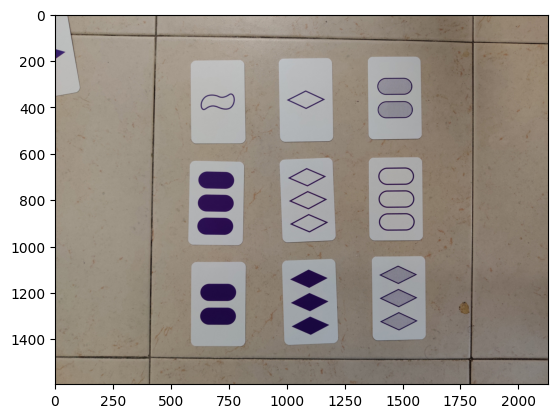

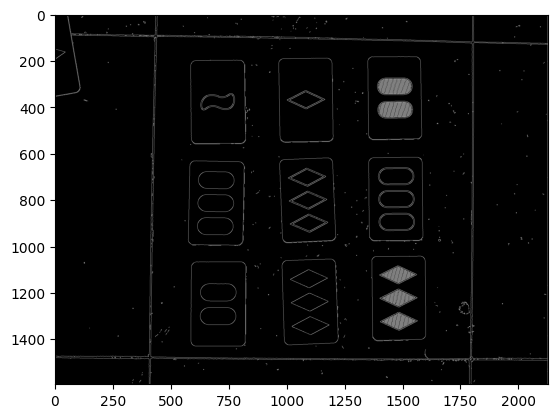

In [34]:
# Read image
path = "./assets/Task2/9B6hJ.jpg"
img = cv2.imread(path, 0)
original = cv2.imread(path)

plt.imshow(cv2.cvtColor(original, cv2.COLOR_RGB2BGR))
plt.show()

# Apply one shot filter
canny = cv2.Canny(img, 80, 150)
# Show image
plt.imshow(canny, cmap='gray')
plt.show()

# Get contours
contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

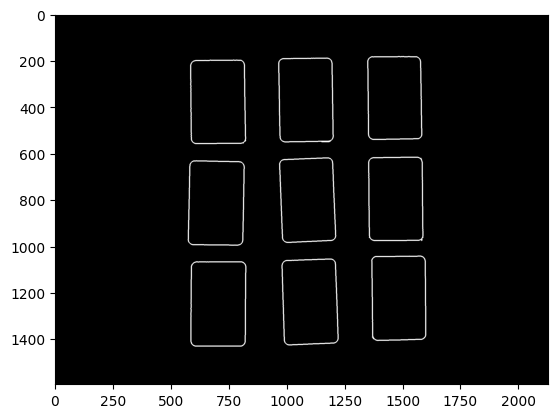

In [57]:
# Filter small contours
def good_cont(cont):
    ret = False
    min_area = 10000

    cont = cv2.approxPolyDP(cont, 0.01* cv2.arcLength(cont, True), True)
    area = cv2.contourArea(cont)
    if area > min_area and len(cont) in [4, 5]: # Get length of contour
        # print("Contour is:",contour, "_________")
        ret = True

    return ret

mask = np.zeros(img.shape)
for contour in contours:
    if good_cont(contour):
        cv2.drawContours(mask, [contour], -1, (255,255,255), 3)


plt.imshow(mask, cmap='gray')
plt.show()